In [1]:
%reload_ext autoreload
%autoreload 2
import tensorflow as tf
import sys
sys.path.append('../../pytools')
import d2l

d2l.gpu_mem_init()

2025-09-09 11:29:35.258013: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-09 11:29:35.321048: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-09 11:29:36.786496: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Memory growth enabled for PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'): True


In [2]:
batch_size = 256
mi_train,mi_test = d2l.load_data_fashion_mnist(batch_size)

I0000 00:00:1757388578.115224 2855535 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30177 MB memory:  -> device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:00:08.0, compute capability: 7.0


In [3]:
net = tf.keras.models.Sequential()
net.add(tf.keras.layers.Flatten(input_shape=(28,28,1)))
weight_ini = tf.initializers.random_normal(mean=0.0, stddev=0.01)
net.add(tf.keras.layers.Dense(10, kernel_initializer=weight_ini))

/home/ubuntu/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-09-09 11:29:38.686486: W external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:237] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 7.0
2025-09-09 11:29:38.686509: W external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:240] Used ptxas at /usr/local/cuda/bin/ptxas
2025-09-09 11:29:38.686566: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:188] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2025-09-09 11:29:38.688442: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:188] Failed to compile generated PTX with ptxas. Fallin

In [4]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [5]:
sgd = tf.keras.optimizers.SGD(0.12)

epoch:14, train_loss:0.426801, train_auc:0.854383
train cost:39.66 sec


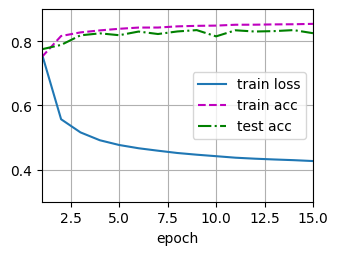

In [6]:
num_epochs = 15
timer = d2l.Timer()
d2l.train_ch3(net, mi_train, mi_test, loss, num_epochs, sgd)
print(f'train cost:{timer.stop():.2f} sec')